# Customer Segmentation for Credit Card Users

#### GitHub URL: 


#### About this project
This project is to study 8950 credit card users and 18 credit card usage variables. The goal is to build a model for clustering the users for marketing strategy. The type of learning is unsupervised learning and the type of task is clustering.

1. Load Data
2. Data Cleaning
3. EDA
4. Feature Preprocessing
5. Models
6. Evaluation Models
7. Hyperparameter Tuning
8. Interpretation of the Clusters
9. Conclusions

Each step including result, analysis and conclusions.

#### Motivation and Goal 

With clustering, businesses can utilize their customer's data and group similar users into small groups for marketing purposes. It can help businesses reduce marketing costs and increase profit. It can also help businesses uncover the potential patterns in the data and open up new business opportunities.

I always get marketing emails about credit cards. But those promotions are not suited for me.
In this dataset, I am interested in analyzing the relationship between credit limits, purchases frequency, cash advances, payments and balances. I aim to utilize the clustering technique to perform customer segmentation and create a marketing strategy.

#### Data Source

The dataset is from a kaggle project named 'Credit Card Dataset for Clustering'. 

#### Citation:

Credit card dataset for clustering. (2018, March 2). Kaggle. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata


#### Dataset
The data set is a CSV format. This tabulated data has a data size of 8950 rows and 18 columns. 
The data types of the features are 14 float 64, 3 int64, and 1 object. 
The features are mainly related to balance, purchases, cash advances, credit limits and payments of credit cards.

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate


In [2]:
df = pd.read_csv("./CC.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Cleaning

1. Check Missing value 
2. Check duplicate data
3. PLot Violineplot to check outliers and drop the outliers


#### 1. Check missing Value
    


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [7]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

In [8]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

#### 2. Check for duplicates


In [10]:
# check if there is duplicate
df.duplicated().sum()


0

#### 3. Check for Outliers


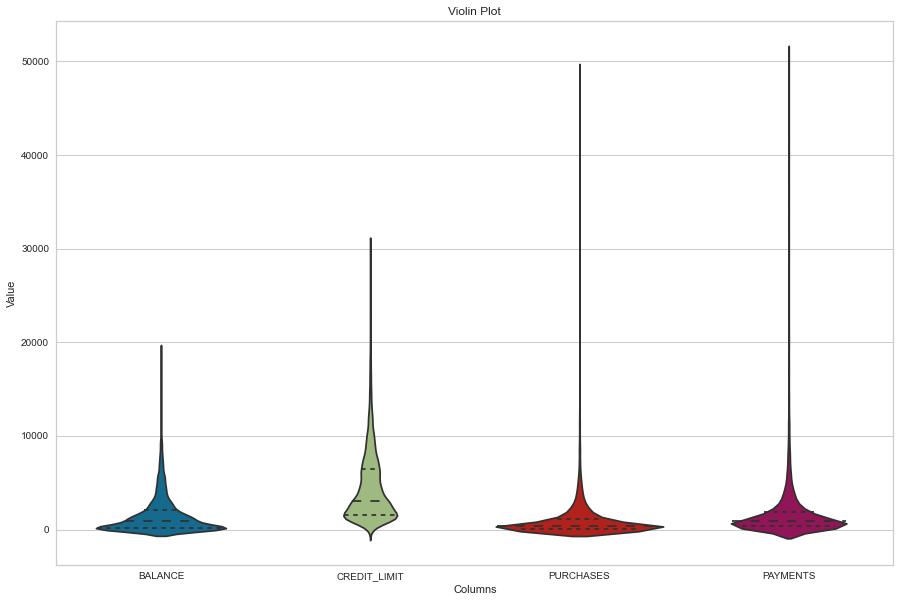

In [11]:
plt.figure(figsize=(15, 10))

sns.violinplot(data = df[['BALANCE', 'CREDIT_LIMIT','PURCHASES','PAYMENTS']], inner="quartile")
plt.title('Violin Plot')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.show()

In [12]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=0)
print('Columns with Outliers:\n')
print(outliers)



Columns with Outliers:

BALANCE                              True
BALANCE_FREQUENCY                    True
CASH_ADVANCE                         True
CASH_ADVANCE_FREQUENCY               True
CASH_ADVANCE_TRX                     True
CREDIT_LIMIT                         True
CUST_ID                             False
INSTALLMENTS_PURCHASES               True
MINIMUM_PAYMENTS                     True
ONEOFF_PURCHASES                     True
ONEOFF_PURCHASES_FREQUENCY          False
PAYMENTS                             True
PRC_FULL_PAYMENT                    False
PURCHASES                            True
PURCHASES_FREQUENCY                 False
PURCHASES_INSTALLMENTS_FREQUENCY    False
PURCHASES_TRX                        True
TENURE                               True
dtype: bool


<ipython-input-12-1f17b3c2bda0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=0)
<ipython-input-12-1f17b3c2bda0>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=0)


#### 3.1 Drop the outlier and Drop columns CUST_ID

In [13]:
df = df.drop(columns =['CUST_ID'])
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

df = df[~outliers]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 8812
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6497 non-null   float64
 1   BALANCE_FREQUENCY                 6497 non-null   float64
 2   PURCHASES                         6497 non-null   float64
 3   ONEOFF_PURCHASES                  6497 non-null   float64
 4   INSTALLMENTS_PURCHASES            6497 non-null   float64
 5   CASH_ADVANCE                      6497 non-null   float64
 6   PURCHASES_FREQUENCY               6497 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6497 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6497 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6497 non-null   float64
 10  CASH_ADVANCE_TRX                  6497 non-null   int64  
 11  PURCHASES_TRX                     6497 non-null   int64  
 12  CREDIT

### Result

##### 1. Missing Value: 

Columns Credit_limit and Minimum_payments's null values < 50%. For column Credit_limit, the std is 3638.81 and the median is 3000. so that means most user's credit limit is < 3638. For column Minimum_payments, the mean is 864, the std is 2372 and the median is 312.34. I will choose the median value to fill the null value for these two columns. 
    
##### 2. Check for duplicates

    
 There is no duplicate data 
 
##### 3. Check for Outlier

  PLot Violineplot for four columns. From the Violineplot we can see there are a lot of outliers. Double check using quantile, there is a total of 13 columns that have outliers. 
  
  Inspecting the outliers, I found out the max of columns MINIMUM_PAYMENTS is 76406.207520 and the max of columns CREDIT_LIMIT is 30,000.00. Which does not make sense.  I decided to drop the outliers and dropped a total of 2453 rows of outliers from the 8950 rows.
  
  
### Conclusions for Data Cleaning
I have filled in the missing value with the median. There is no duplicate data. There is a total of 13 columns that have outliers. After inspecting the outliers, I decided to drop the outliers and also dropped column 'CUST_ID' as I no longer needed it for the analysis.

## EDA

Plane of Analysis:

    1. Summary statistics to understand the mean, std, min and max of the dataset

    2. Scatter and histogram plot to understand the distribution of the columns

    3. Correlation matrix plot to understand the correlations.

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,1196.104047,0.886801,606.739323,334.476132,272.516951,569.427384,0.470728,0.178418,0.344021,0.104167,2.067724,10.573957,3964.848430,1102.684732,488.008213,0.149670,11.892566
std,1463.663962,0.219103,738.040632,556.347958,403.863195,1031.389484,0.391345,0.274924,0.385986,0.154895,3.433441,12.375468,3021.837535,1082.665847,514.414177,0.285464,0.396842
min,0.001214,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,10.000000
25%,98.427228,0.909091,45.650000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,383.282850,167.050694,0.000000,12.000000
50%,715.641470,1.000000,334.730000,23.650000,79.240000,0.000000,0.416667,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,743.358844,276.551931,0.000000,12.000000
75%,1663.967468,1.000000,896.180000,453.000000,405.840000,748.152104,0.916667,0.250000,0.666667,0.166667,3.000000,14.000000,6000.000000,1442.246195,624.895688,0.125000,12.000000
max,7888.028118,1.000000,4266.250000,2789.850000,2053.140000,5468.620604,1.000000,1.000000,1.000000,0.800000,17.000000,67.000000,18000.000000,6981.148039,2996.008935,1.000000,12.000000


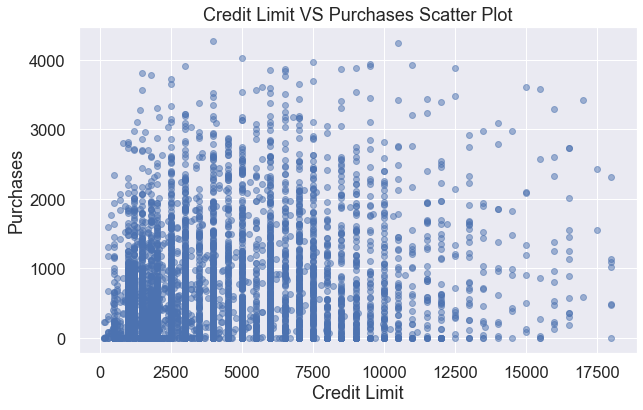

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'], alpha=0.5)
plt.title('Credit Limit VS Purchases Scatter Plot')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases')
plt.show()

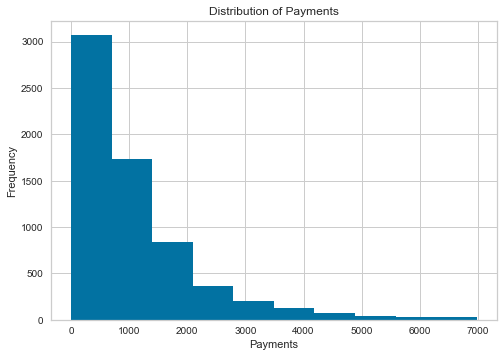

In [17]:
plt.hist(df['PAYMENTS'])
plt.title('Distribution of Payments')
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.show()

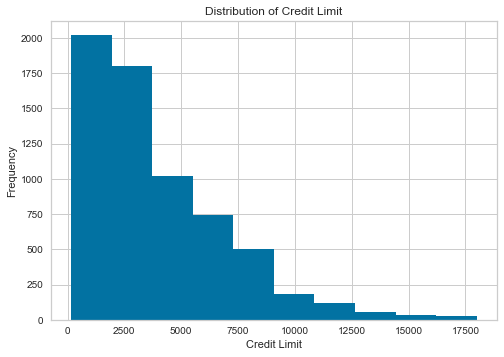

In [18]:
plt.hist(df['CREDIT_LIMIT'])
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

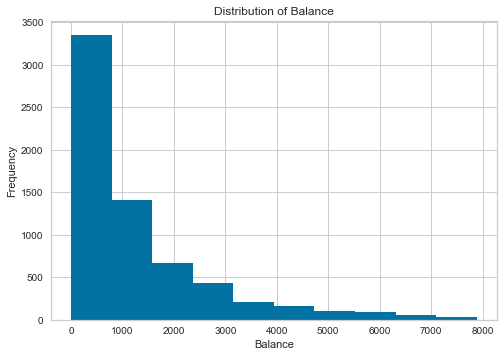

In [19]:
plt.hist(df['BALANCE'])
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

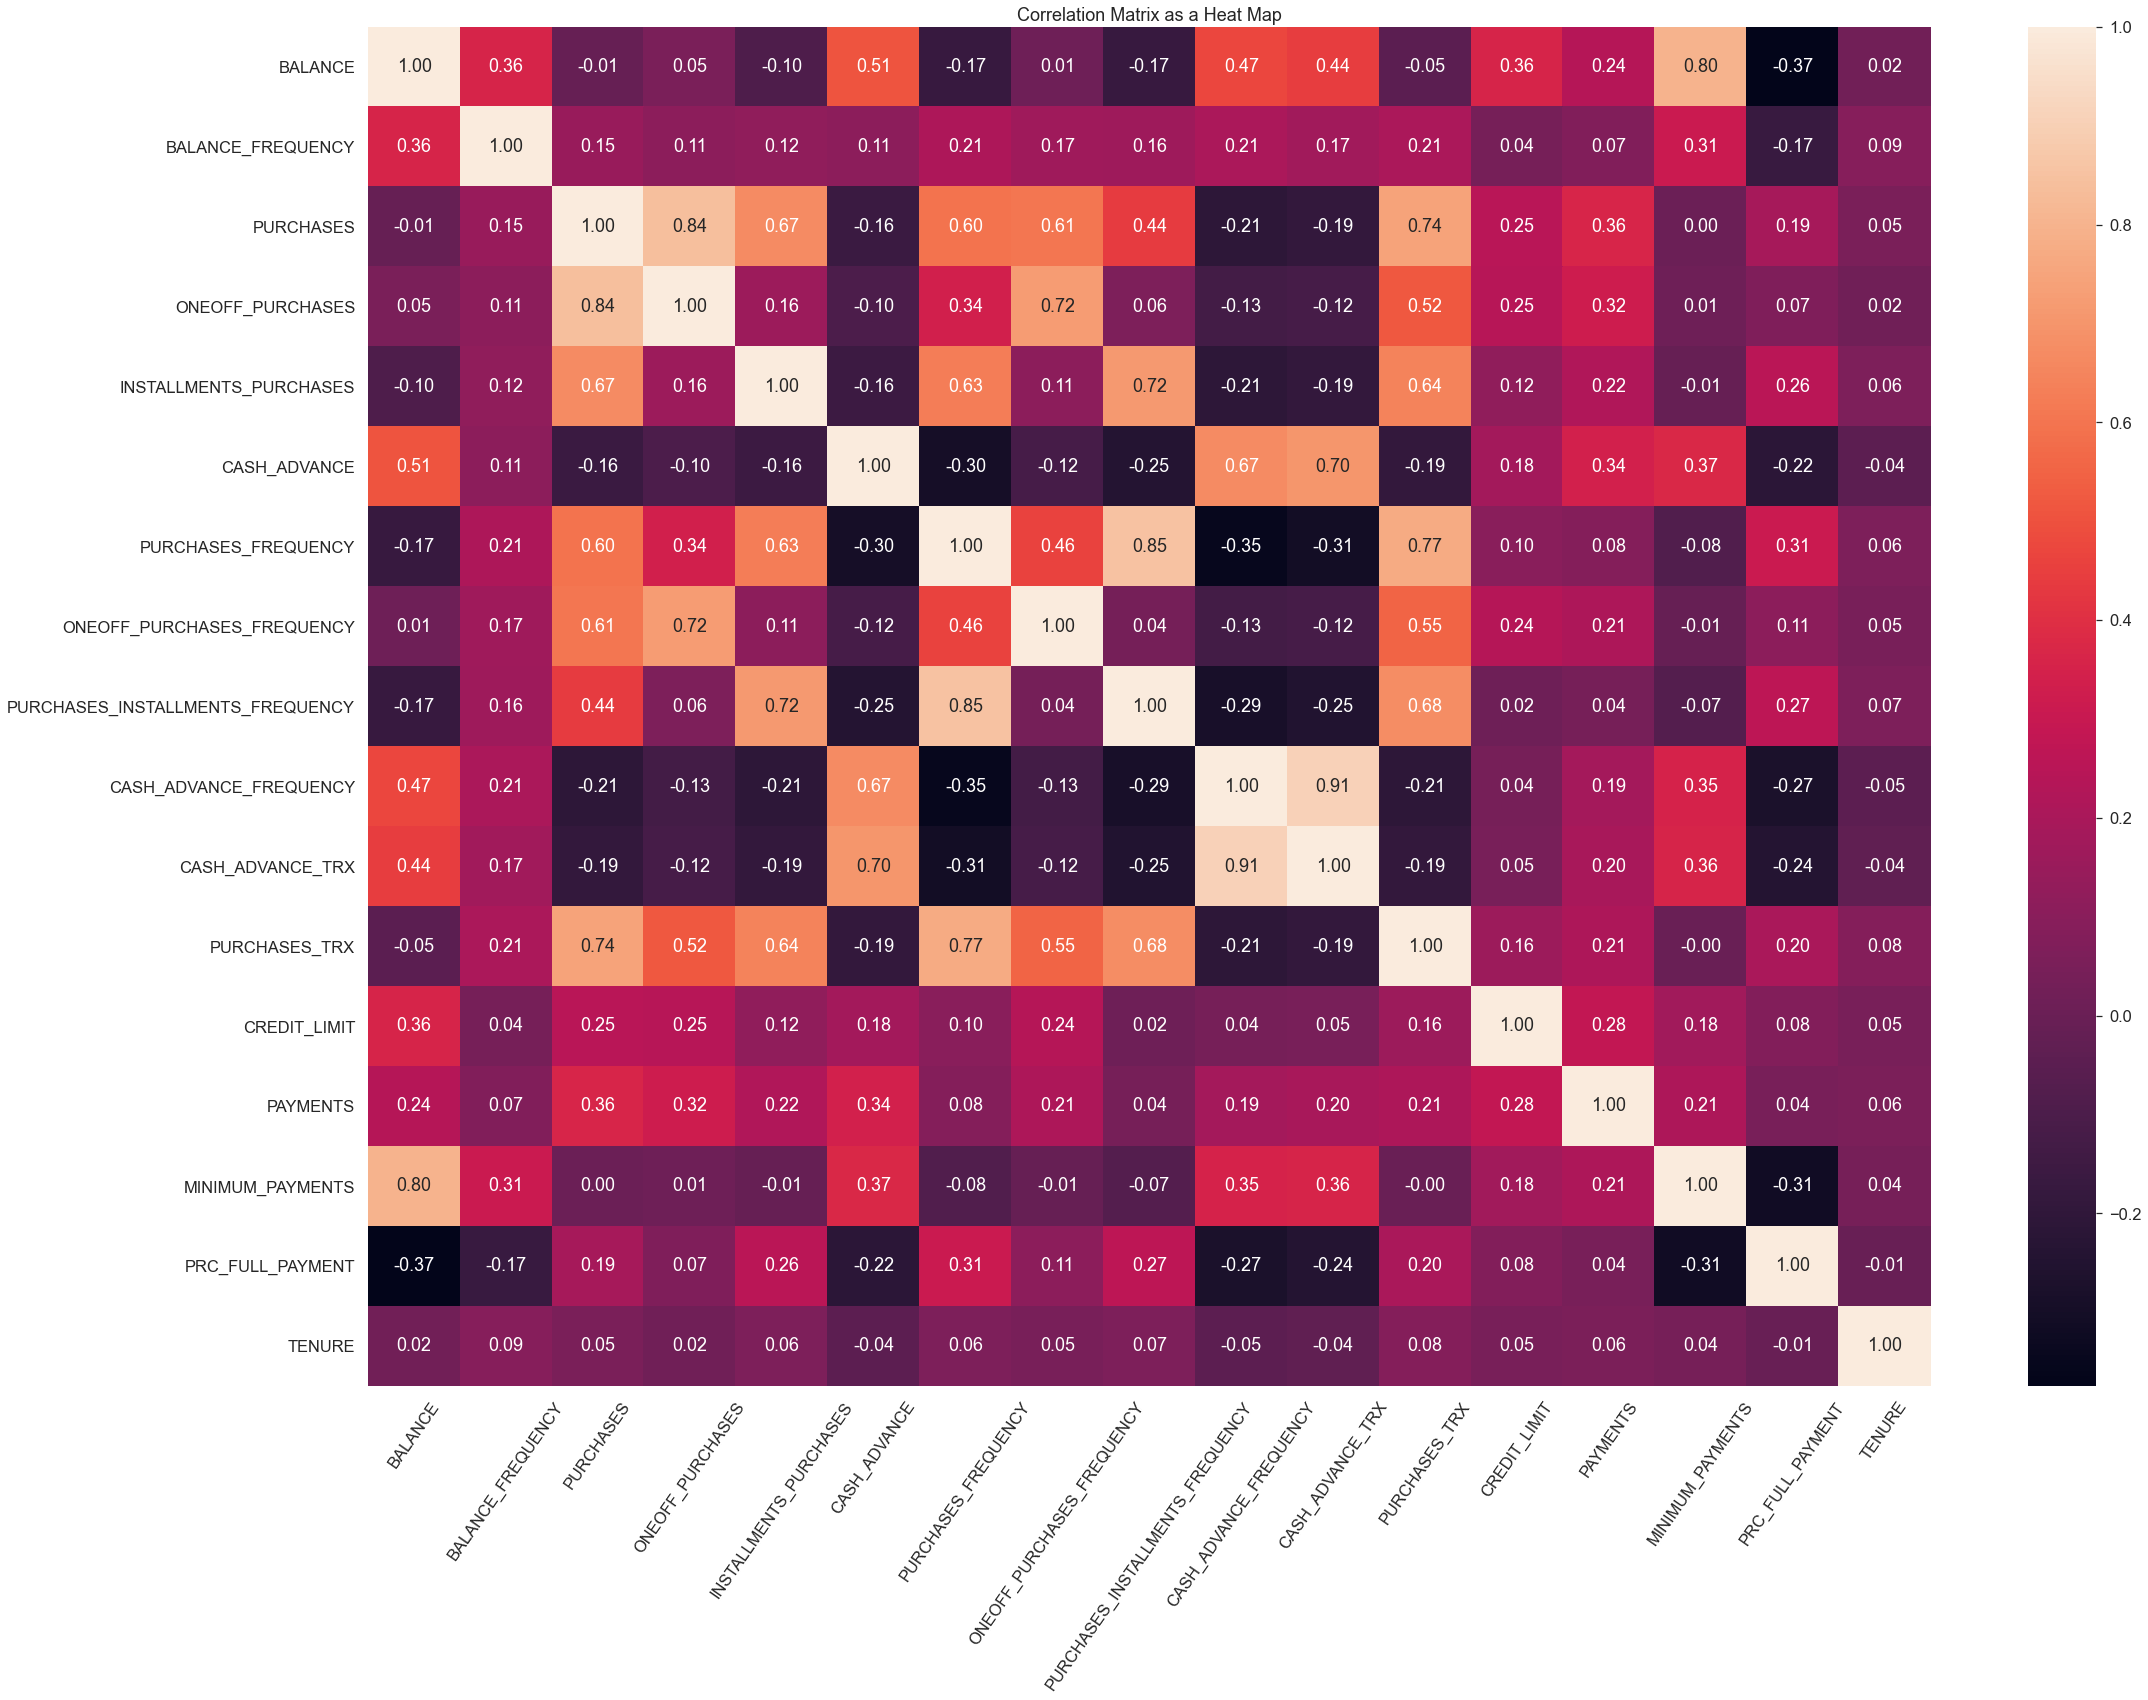

In [20]:
correlation = df.corr()

plt.figure(figsize=(35, 25))
sns.set(font_scale=1.5) 
sns.heatmap(correlation, annot=True,fmt=".2f")
plt.xticks(rotation=55)
plt.title("Correlation Matrix as a Heat Map")
plt.show()

#### Result and Analysis:

1. summary statistics

    I used a describe function to perform the summary statistics on the dataset.
    

2. visualization

    I have plotted the 'Credit Limit VS Purchases Scatter Plot', 'Distribution of Balance',' Distribution of Credit limit' and 'Distribution of Payments' to understand the distributions. 
    
    Most of the balance and payments are under 800 dollars. Most of the credit limits are under 3500 dollars.

   
3. correlation matrix

    From the correlation matrix, we can see that some features in the dataset have high correlation and may suffer multicollinearity. 



#### Conclusions and Discussions for EDA

    Credit_limit and balance have a positive linear relationship. Credit_limit vs purchase and Credit_limit vs payments have weak positive linear relationships.

    Purchases and Oneoff_Purchases, Oneoff_purchases vs Oneoff_purchass Frequency, Cash_advance vs Cash_advance_trx and more pairs have correlation values higher than 0.70 indicating of collinearity problem. I will perform feature preprocessing to reduce the impact of multicollinearity issues.


## Feature Preprocessing:

1. StandardScaler
2. PCA
3. Elbow plot

In [21]:
scaler = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(scaler, columns=df.columns)

In [22]:
pca = PCA()
pca.fit(df_scaled)
df_s_p = pca.transform(df_scaled)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

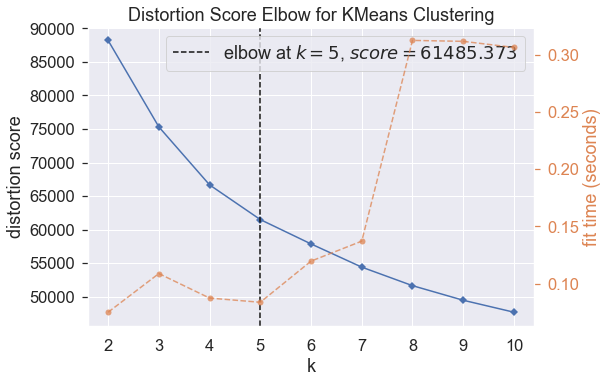

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
Elbow = KElbowVisualizer(KMeans())
Elbow.fit(df_s_p)
Elbow.show()

#### Result and Analysis:

1. StandardScaler 

The range has a quite big difference between columns, such as CREID_LIMIT VS PURCHASES_TX.
It is better to standardize the dataset. Also, performing standard scaler before PCA will reduces PCA bias.

Standard scaler scale the dataset to have mean at 0 and variance at 1



2. PCA

From the correlation matrix, we know some columns suffer collinearity problems. 
I will perform dimensionality reduction to reduce the impact of multicollinearity issues.


3. Elbow

I have plotted the Elbow plot from KElbowVisualizer to choose the number of clusters. 

#### Conclusions for Feature Preprocessing:

From the Elbow plot, we can see number of clusters = 5 is the best selection.

# Models

## Train Models with Scaling and PCA

In [24]:
AC = AgglomerativeClustering(n_clusters=5)
yp_ac1 = AC.fit_predict(df_s_p)

s_ac1 = silhouette_score(df_s_p, yp_ac1)
print('Agglomerative Clustering with Scaling :\n' 'Silhouette Score:', s_ac1)


Agglomerative Clustering with Scaling :
Silhouette Score: 0.15335671528330022


In [25]:

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(df_s_p)
yp1 =kmeans.predict(df_s_p)

s_k1 = silhouette_score(df_s_p, yp1)
print('Kmeans with Scaling :\n'  'Silhouette Score :', s_k1)
      

Kmeans with Scaling :
Silhouette Score : 0.1900283514905253


## Re-train Models without Scaling and only PCA to Improve the Result

In [26]:
pca = PCA()
pca.fit(df)
df_pca = pca.transform(df)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

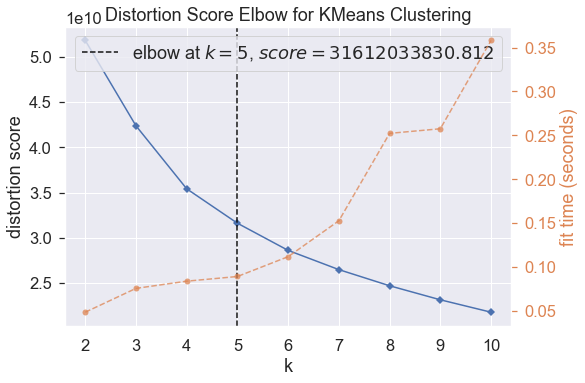

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
Elbow = KElbowVisualizer(KMeans())
Elbow.fit(df_pca)
Elbow.show()

In [28]:
AC = AgglomerativeClustering(n_clusters=5)
yp_ac2 = AC.fit_predict(df_pca)

s_ac2 = silhouette_score(df_pca, yp_ac2)
print('Agglomerative Clustering without Scaling :\n' 'Silhouette Score:', s_ac2)

Agglomerative Clustering without Scaling :
Silhouette Score: 0.19151249625018502


In [29]:

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(df_pca)
yp2 =kmeans.predict(df_pca)

s_k2 = silhouette_score(df_pca, yp2)
print('Kmeans without Scaling :\n'  'Silhouette Score :', s_k2)

Kmeans without Scaling :
Silhouette Score : 0.3372605151756743


## Evaluation Models
1. Comparison of silhouette scores

    Silhouette Scores measure the similarity between the data point and their cluster. The range is 1 to -1. 
    1 means the data are well-clustered.
    

2. Comparison of clusters


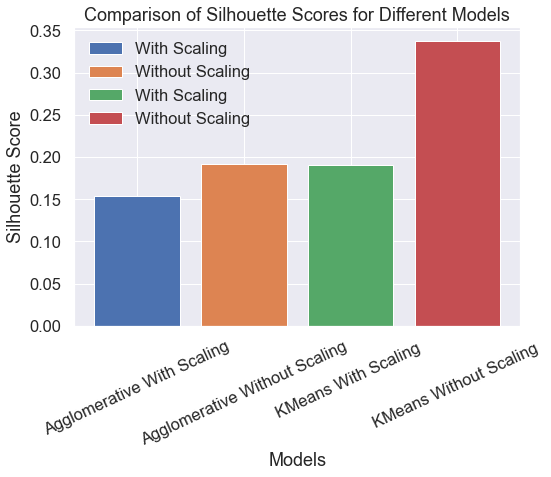

In [30]:
plt.bar('Agglomerative With Scaling', s_ac1,  label='With Scaling')
plt.bar('Agglomerative Without Scaling', s_ac2,  label='Without Scaling')

plt.bar('KMeans With Scaling ', s_k1, label='With Scaling')
plt.bar('KMeans Without Scaling ', s_k2,  label='Without Scaling')

plt.title('Comparison of Silhouette Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=25)

plt.legend()

plt.show()




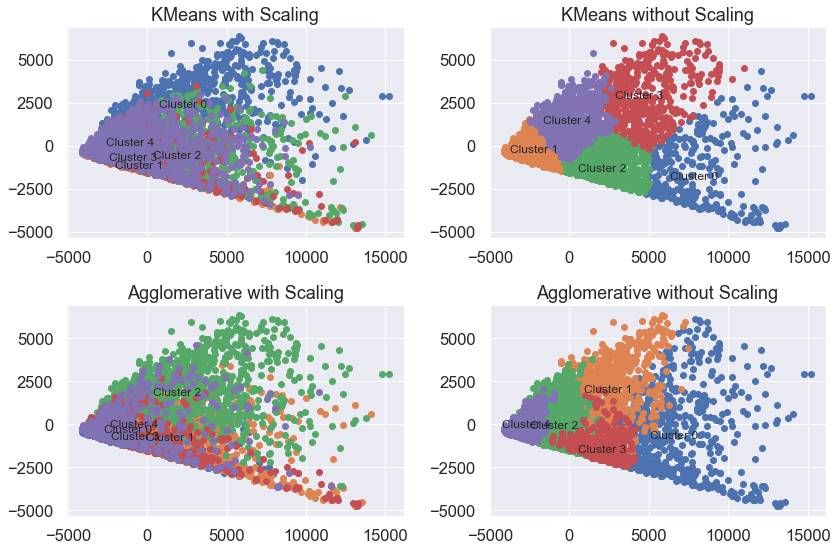

In [63]:
predicts = [yp1, yp2, yp_ac1, yp_ac2]
titles = ['KMeans with Scaling', 'KMeans without Scaling', 'Agglomerative with Scaling', 'Agglomerative without Scaling']

plt.figure(figsize=(12, 8))

for i, (predict, title) in enumerate(zip(predicts, titles), start=1):
    plt.subplot(2, 2, i)
    for label in np.unique(predict):
        cluster_indices = np.where(predict == label)[0]
        plt.scatter(df_pca[cluster_indices, 0], df_pca[cluster_indices, 1])

        centroid = df_pca[cluster_indices].mean(axis=0)
        plt.text(centroid[0], centroid[1], f'Cluster {label}', fontsize=12, ha='center', va='center')

    plt.title(f'{title}')

plt.tight_layout()
plt.show()

#### Result and Analysis:

1. Train Models with Scaling and PCA 

      Result: Comparison of Silhouette Scores for Different Models


2. Re-train Models without Scaling and only PCA to Improve the Result

    Replot the elbow plot using data that is only processed with PCA. From the elbow plot, we can see the best choice of number of clusters is 5.
    
    Both algorithm's silhouette score is improved. so standandscaler impacts the clustering algorithm performance because the clustering algorithm uses a distance metric to separate the data.
    

3. Evaluation Models
    
    From the 'Comparison of Silhouette Scores for Different Models', we can see the Kmeans without scaling have the highest silhouette scores.

    From the above four cluster plots, we can see that Kmeans without scaling have separated the data the best.

#### Conclusions for Models and Evaluation Models

    Standandscaler impacts the clustering algorithm performance because the clustering algorithm uses a distance metric to separate the data.
 
    Kmeans without scaling have the highest silhouette scores and well separate the cluster. I will perform Hyperparameter tuning on Kmeans without scaling.




# Hyperparameter tuning for Kmeans without scaling

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'n_init': ['auto', 'int'],
    'tol': [ 1e-6],
    'max_iter': [ 100, 200, 300],
    'algorithm': ['auto', 'full', 'elkan']

}


grid_search = GridSearchCV(KMeans(), param_grid, cv=5)

grid_search.fit(df_pca)




/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'max_iter': [100, 200, 300],
                         'n_clusters': [2, 3, 4, 5], 'n_init': ['auto', 'int'],
                         'tol': [1e-06]})

In [33]:
print("Best Parameters:", grid_search.best_params_, '\n')

best_kmeans = grid_search.best_estimator_

s_best = silhouette_score(df_pca, best_kmeans.labels_)

print('KMeans without Scaling after hyperparameter :\n' 'Silhouette Score:', s_best)


Best Parameters: {'algorithm': 'elkan', 'max_iter': 100, 'n_clusters': 5, 'n_init': 'auto', 'tol': 1e-06} 

KMeans without Scaling after hyperparameter :
Silhouette Score: 0.3438217152156202


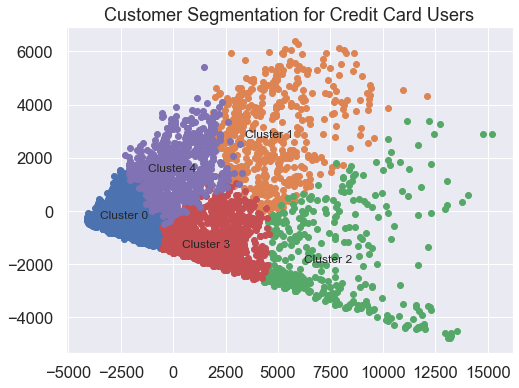

In [73]:
labels = best_kmeans.labels_
plt.figure(figsize=(8, 6))

for label in np.unique(labels):
    cluster_indices = np.where(labels == label)[0]
    plt.scatter(df_pca[cluster_indices, 0], df_pca[cluster_indices, 1])
    
    centroid = df_pca[cluster_indices].mean(axis=0)
    plt.text(centroid[0], centroid[1], f'Cluster {label}', fontsize=12, ha='center', va='center')


plt.title('Customer Segmentation for Credit Card Users')


plt.show()

### Summary Table

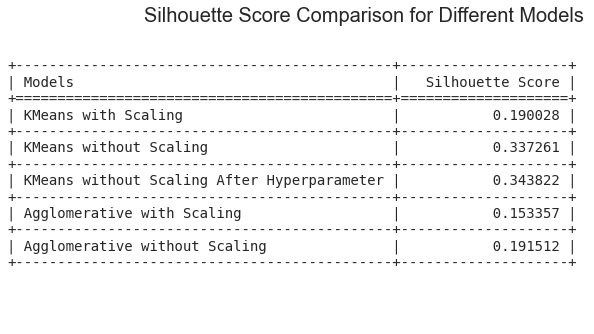

In [36]:
name = ['silhouette_score']

scores = [s_k1,s_k2,s_best,s_ac1,s_ac2]

name = ['KMeans with Scaling', 'KMeans without Scaling', 'KMeans without Scaling After Hyperparameter', 'Agglomerative with Scaling', 'Agglomerative without Scaling']

table_data = zip(name, scores)
table = tabulate(table_data, headers=['Models', 'Silhouette Score'], tablefmt='grid')

plt.text(-0.3, 0.2, table, {'fontsize': 14, 'fontfamily': 'monospace'})
plt.axis('off')
plt.title('Silhouette Score Comparison for Different Models', fontsize=20)
plt.show()

#### Result and Analysis:
Hyperparameter tuning for Kmeans without scaling

Best Parameters: {'algorithm': 'elkan', 'max_iter': 100, 'n_clusters': 5, 'n_init': 'auto', 'tol': 1e-06} 


#### Conclusions for Hyperparameter Tuning

From the summary table, we can see the silhouette score increase from 0.337261 to 0.343822 after the Hyperparameter tuning. 


## Interpretation of the clusters

In [38]:
df['Cluster'] = best_kmeans.labels_

cluster_means = df.groupby('Cluster').mean()

print("Cluster Feature Analysis:")
print(cluster_means)

Cluster Feature Analysis:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         617.263125           0.868348   464.339405        223.861329   
1        4639.647567           0.991945   563.873359        363.745444   
2        1354.779584           0.884722  1096.644840        686.816536   
3         553.182597           0.846574   909.591366        516.227360   
4        2193.536934           0.954243   450.509484        271.840311   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    240.705703    232.922507             0.461333   
1                    200.127915   2166.170572             0.348918   
2                    409.828305    345.138029             0.604836   
3                    393.946900    138.958776             0.606911   
4                    178.766133   1

### Result,  Analysis and Conclusions :

####  Name of Group 0: Users who have moderate usage and regular payment

Cluster 0: Moderate usage of credit cards with low balance, lowest credit limit and moderate cash advance transactions. The percentage for full payment is moderate. 
    
     I will recommend more exclusive offers to increase the usage of the credit card through email and mail. So I will recommend other banking services such as checking and saving.

####  Name of Group 1: User who have big balance and high cash advance transactions


Cluster 1: Low usage of credit cards with the highest balance, higher credit limit and highest cash advance transactions. The percentage for full payment is the lowest.


     I will recommend exclusive installment payment offers to help the customers pay off their credit cards and provide more advice on how to manage the credit cards. 
     
     
####  Name of Group 2: User who love the credit card and could benefit from a premium card

Cluster 2: High usage of credit cards with moderate balance, highest credit limit and low cash advance transactions. The percentage for full payment is higher.

     I will recommend more premium credit cards with higher reward points or cash-back percentages.
     
#### Name of Group 3: User who love the credit card and could benefit from a more limits
       
 Cluster 3: High usage of credit cards with low balance, moderate credit limit and lowest cash advance transactions. The percentage for full payment is the highest.

     I will recommend limiting increase, up and cross-selling to enhance customer loyalty.
        
#### Name of Group 4: User who have a higher balance and could benefit from a lower rate

 Cluster 4: Lowest usage of credit cards with a higher balance, lower credit limit and higher cash advance transaction. The percentage for full payment is lower. 

     I will recommend credit cards with lower interest rates, and cash advance rates. I will also recommend a customer personal loan with lower rates to reduce the cash advance transaction. 
    
    


# Conclusion for this project

    This project is to study 8950 credit card users and 18 credit card usage variables. The goal is to build a model for clustering the users for marketing strategy. For data cleaning, I have filled in the missing values and dropped the outliers. For the EDA step, I plot the histogram plots and correlation matrix. From the correlation matrix, we can see the dataset suffers from multicollinearity issues. I have performed standard scaler and PCA to reduce the impact of the multicollinearity issues and used elbow plots to choose the number of clusters. 

    For models, I have trained the Agglomerative clustering and Kmeans models. However, scaling the dataset has a negative impact on the clustering algorithm. I have retrained the model with only PCA.  I have chosen silhouette scores as the evaluation metrics and the range of silhouette scores is from 1 to -1. Because silhouette scores measure the similarity between the data point and their cluster. The higher the score means the data are well-clustered. 

    For evaluation, I plot a comparison of silhouette scores and 2D clusters for each model. Kmeans without scaling have the highest scores. Performed hyperparameter tuning on Kmeans. The scores increase from 0.337261 to 0.343822. 

# Discuss for this project: learning, takeaways, failures and improvements:
    
    Performing PCA before the standard scaler reduces PCA bias. However, Standandscaler impacts the clustering algorithm performance because the clustering algorithm uses a distance metric to separate the data.
    
    Silhouette Scores measure the similarity between the data point and their cluster. The range is 1 to -1. 
    1 means the data are well-clustered.
 
    I have also learned how to perform customer segmentation and interpretation of the clusters.
     
    Because of the limitation of the dataset, clusters 1 and 4 are kind of similar and The suggestion is really broad for marketing strategy. If I have more data related to payment transactions and purchase details. I can separate clusters 1 and 4, 2 and 3 better and provide a more detailed marketing strategy. 





## Reference:

    1. Hara, A. (2022, January 4). Finding the optimal cluster size with YellowBrick - Atsushi Hara - Medium. Medium. https://atsushihara.medium.com/finding-the-optimal-cluster-size-with-yellowbrick-f0d2df9d107b
    
    2. Elbow Method — Yellowbrick v1.5 documentation. (n.d.). https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
    
    3. Chaudhary, M. (2021, December 14). Silhouette Analysis in K-Means Clustering - Mukesh Chaudhary - Medium. Medium. https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111
    
    4. Sabanasimbutt. (2020, January 17). Clustering & Visualization of Clusters using PCA. https://www.kaggle.com/code/sabanasimbutt/clustering-visualization-of-clusters-using-pca